In [3]:
import torch
import torch.nn as nn #뉴럴 네트워크 패키지 사용
import matplotlib.pyplot as plt #시각화

device = 'cuda' if torch.cuda.is_available() else 'cpu' #코다 gpu를 사용할 건데, 불가능한 환경이면 cpu 사용 선언
torch.manual_seed(777) #시드를 정해놓으면 항상 같은 결과를 내보낼 수 있다(환경 지정)
if device =='cuda':
    torch.cuda.maual_seed_all(777)
# srand(time(null))과 비슷하지만 살짝 다른 결, 매번 같은 결과를 얻기 위한 고정된 시드 사용법(마크 시드)
# 내부적으로는 랜덤하게 돌아갈지 몰라도 그 랜덤한 순서가 똑같기 때문에 똑같은 결과가 나오는 것

#data preparation
x =torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device) #총 4개의 데이터를 플로텐서로 하는 텐서 자료구조를 만들음
y =torch.FloatTensor([[0],[1],[1],[0]]).to(device) #인풋이 정해졌으면 아웃풋도 정해져야 함

# 이렇게 되면 데이터가 x, y 입력과 그 다음 정답 데이터가 준비된 것

In [4]:
#network architecture
#모델 만들기, 여기서는 싱글레이어 퍼셉트론 네트워크 모델을 만들 것
class SingleLayerPerceptron(nn.Module): #nn모듈을 상속 받아서 커스텀 신경망 모델을 정의하는 것, 
    #singlelayer은 입력측과 출력층만 존재, 은닉층 부재
    
    def __init__(self, input_size, output_size =1): #입력 및 출력 차원 정의
        super(SingleLayerPerceptron, self).__init__() #부모클래스인 nn.midule의 초기화 실행
        self.layer =nn.Sequential(nn.Linear(input_size, output_size, bias=True), nn.Sigmoid()) #activation function을 하나 생성
        #sequeantial로 입력 순서에 맞게 처리하도록.. 여러층을 순차적으로 쌓아 한 줄로 리리

    # 네트워크에서 하는 동작을 지금까지 2개 배웠다. 하나는 포워드 프로파게이션, 하나는 백워드 프로파게이션
    # forward porpagation을 위한 함수 동작을 만들어자자
    # 네트워크 오디오를 구성하고 있는 구조를 정의해줬으면 어떻게 동작할 건지 프로파게이션 함수를 밑에 만들어줘야 한다
    # 이것을 forward라고 당장은 정의할 것임
    # 싱글레이어의 퍼셉트론 클래스를 만들었고, 이 클래스는 뉴럴 네트워크 패키지에 있는 모듈을 상속..
    
    def forward(self, x):
        output =self.layer(x)
        return output
        # 신경망의 순전파 연산을 정의
        # 입력 x를 받아서 self.layer를 거쳐 나온 출력값을 반환

# 이 뉴럴 네트워크 모듈에 있는 함수 중에는 forward가 있음
# 그렇게 때문에 상속을 했으면 무조건 forward 함수를 만들어야 함

# forward에 인풋데이터(x)가 입력되고 레이어를 거쳐 아웃풋으로 반환됨
# 이 인풋데이터가 어떻게 처리가 되었는가?
# 잉여에 먼저 들어가고 출력이 시그모이드로 들어가서 마지막 최종 아웃풋화 된 것, 아웃풋은 레이어를 거친 거니까 최종적으로 리턴해서 반환

In [19]:
#training setting

# forwardpropagation을 했으니까 데이터가 입력이 되면 예측값이 나오는 것을 확인했다
# 그 예측값을 가지고 뭘 하겠는가, 그 모델이 가지고 있는 5차 로스를 보여 품질을 보는 것
# 그 손실을 가지고 모델을 학습할 때 사용하는 backpropagation의 가중치를 최적화할 수 있으니까

# 앞에서 해줬어야 되는 인풋 파라미터 코드 학습을 위한 파라미터들을 여기서 설정함
# 첫 번째로 모델을 만들어줌
# 아까 싱글레이어 퍼셉트론을 만들었으니까 여기선 이 모델을 하나 만들어줌
# 클래스니깐 그냥 이름만 호출해서 생성



model =SingleLayerPerceptron(2,1).to(device) #단일 계층 퍼셉트론 모델을 생성, input2 output1

criterion =torch.nn.BCELoss().to(device) 
#binary cross entropy loss(이진 분류 손실 함수) 설정
# 이 함수는 예측확률과 실제 라벨 간의 차이를 계산

optimizer =torch.optim.SGD(model.parameters(), lr=1)
#stochastic gradient descent(확률적 경사 하강법)을 사용해서 가중치를 업데이트
# model.parameters() 학습 대상이 되는 모델의 파라미터들
# lr=1은 학습률(learning rate)이며, 매우 큰 값임(실제 학습에서는 평균적으로 0.01~0.001 쯤을 사용함)

n_epochs =10000
#학습할 총 반복 횟수 (epoch수)
# 한 epoch는 전체 데이터를 한 번 다 학습하는 과정
# 여기서는 10000번 반복해서 모델을 학습함

tot_losses =list()
#  학습 과정 중 에폭마다 손실을 저장하기 위한 리스트
# 이것을 시각화 해서 손실이 줄어드는 과정을 확인할 수 있음

Epoch100 done! -loss: 0.6931
Epoch200 done! -loss: 0.6931
Epoch300 done! -loss: 0.6931
Epoch400 done! -loss: 0.6931
Epoch500 done! -loss: 0.6931
Epoch600 done! -loss: 0.6931
Epoch700 done! -loss: 0.6931
Epoch800 done! -loss: 0.6931
Epoch900 done! -loss: 0.6931
Epoch1000 done! -loss: 0.6931
Epoch1100 done! -loss: 0.6931
Epoch1200 done! -loss: 0.6931
Epoch1300 done! -loss: 0.6931
Epoch1400 done! -loss: 0.6931
Epoch1500 done! -loss: 0.6931
Epoch1600 done! -loss: 0.6931
Epoch1700 done! -loss: 0.6931
Epoch1800 done! -loss: 0.6931
Epoch1900 done! -loss: 0.6931
Epoch2000 done! -loss: 0.6931
Epoch2100 done! -loss: 0.6931
Epoch2200 done! -loss: 0.6931
Epoch2300 done! -loss: 0.6931
Epoch2400 done! -loss: 0.6931
Epoch2500 done! -loss: 0.6931
Epoch2600 done! -loss: 0.6931
Epoch2700 done! -loss: 0.6931
Epoch2800 done! -loss: 0.6931
Epoch2900 done! -loss: 0.6931
Epoch3000 done! -loss: 0.6931
Epoch3100 done! -loss: 0.6931
Epoch3200 done! -loss: 0.6931
Epoch3300 done! -loss: 0.6931
Epoch3400 done! -lo

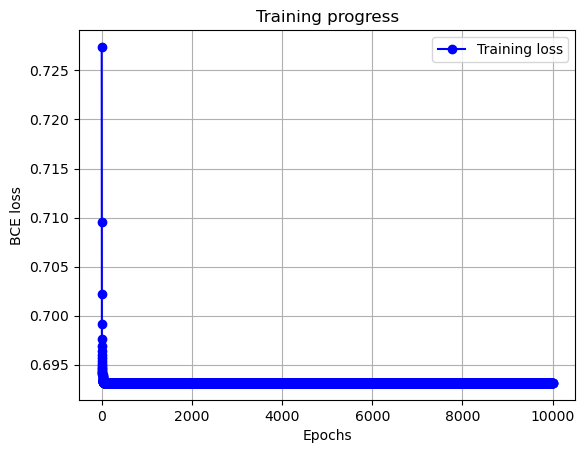

In [29]:
#train the model
for epoch in range(n_epochs):
    y_preds =model(x)
    loss =criterion(y_preds, y)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    tot_losses.append(loss.item())

    if(epoch +1)%100 ==0:
        print(f'Epoch{epoch +1} done! -loss: {round(loss.item(), 4)}')
        

#plot the total losses over epochs
plt.plot(tot_losses, marker ='o', linestyle='-', color='b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel("BCE loss")
plt.title('Training progress')
plt.grid(True)
plt.legend()
plt.show()

# 여기서 선형 레이어의 특징이 나옴
# 절벽형 구조라던가, 단일계층이라 학습이 빠르다던가
초

In [31]:
#check prediction results
y_preds =model(x)
print(y_preds.cpu().detach().numpy())
print(y.cpu().detach().numpy())

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[0.]
 [1.]
 [1.]
 [0.]]
